<a href="https://colab.research.google.com/github/Nikita2w345/MMVSULAB1/blob/main/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 3
# Выполнил студент 4 курса группы КМА Свиридов Никита
# Построение уравнения линейной и параболической модели

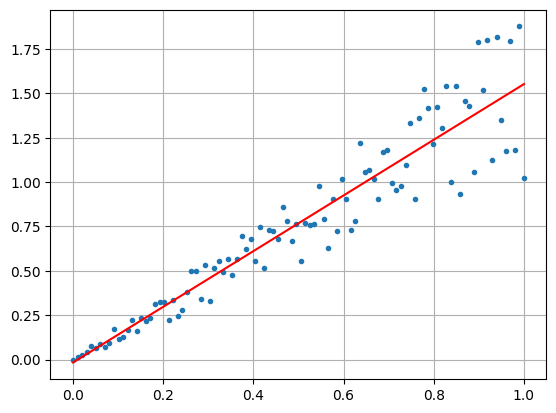

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# Создаём область построения
x=np.linspace(0,1,100)
y=x+x*np.random.random(len(x))
A=np.vstack([x,np.ones(len(x))]).T
# Задаём параметры линейной модели
a,b=np.linalg.lstsq(A,y,rcond=None)[0]
plt.plot(x,y,'.')
# Строим график линейной модели
plt.plot(x,x*a+b,'r')
plt.grid(True)
plt.show()

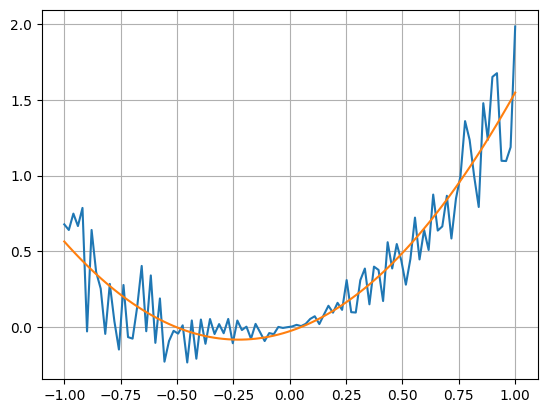

In [8]:
from scipy.optimize import curve_fit
# Создаём область построения
x=np.linspace(-1,1,100)
y=x**2+x*np.random.random(len(x))
# Задаём функцию параболической модели
def f(x,a,b,c):
  return a*x**2+b*x+c
# Задаём параметры параболической модели
(a,b,c),_=curve_fit(f,x,y)
plt.plot(x,y,'')
# Строим график параболической модели
plt.plot(x,f(x,a,b,c))
plt.grid(True)
plt.show()

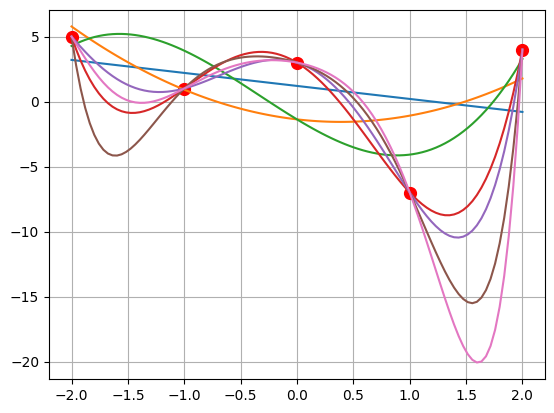

In [19]:
from scipy.integrate import odeint
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
x=np.array([-2,-1,0,1,2])
y=np.array([5,1,3,-7,4])
data=np.vstack([x,y]).T
x= x[:,np.newaxis]
x_long = np.linspace(-2,2,100)[:,np.newaxis]
model=make_pipeline(PolynomialFeatures(1),Ridge(alpha=1e-3))
model.fit(x,y)
y_predict=model.predict(x_long)
%matplotlib inline
plt.plot(x,y,'r.',markersize=17)
for p in [1,2,3,4,5,6,7]:
  model=make_pipeline(PolynomialFeatures(p),Ridge(alpha=1e-3))
  model.fit(x,y)
  y_predict=model.predict(x_long)
  plt.plot (x_long,y_predict,label=str(p))
plt.grid(True)
plt.show()